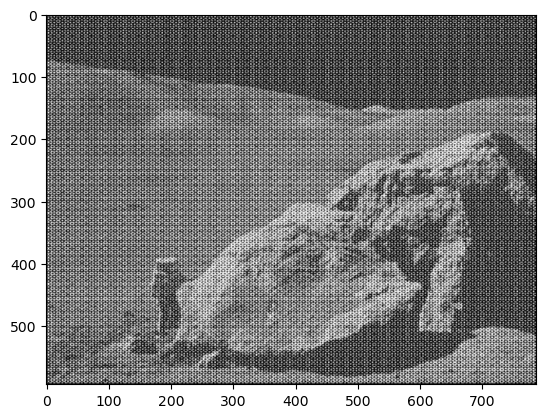

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

img = cv2.imread('periodic_noise_1.JPG', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

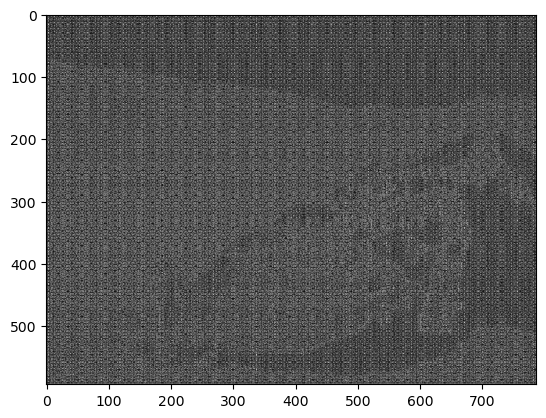

In [10]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
shift = np.fft.fftshift(dft)

sigma = 30
n, m = img.shape
x, y = np.meshgrid(np.arange(0, m, 1), np.arange(0, n, 1))

gauss_mask = np.exp(-((x - (m // 2)) ** 2 + (y - (n // 2)) ** 2) / (2 * sigma ** 2))
mask = 1 - gauss_mask

shift = shift * mask[:, :, np.newaxis]

f_shift = np.fft.ifftshift(shift)
img_back = cv2.idft(f_shift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
plt.imshow(img_back, cmap='gray')

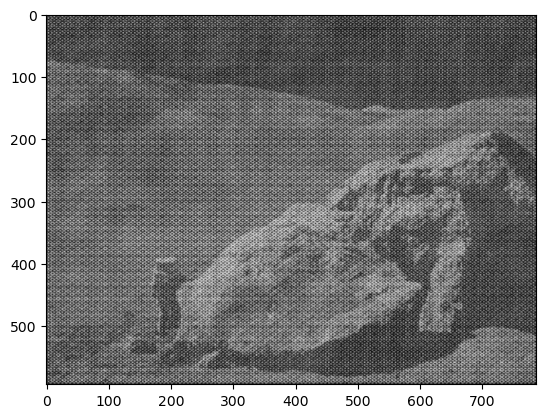

In [11]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(shift[:, :, 0], shift[:, :, 1]))
local_max = peak_local_max(magnitude_spectrum, min_distance=15, threshold_abs=200)

n, m = img.shape
mask = np.copy(shift)
mask[:, :, :] = 1

for i in local_max:
    r = np.int32(((i[0] - n // 2) ** 2 + (i[1] - m // 2) ** 2) ** (1 / 2))
    cv2.circle(mask, (n // 2, m // 2), r, (0, 0))

shift = shift * mask

f_shift = np.fft.ifftshift(shift)
img_back = cv2.idft(f_shift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
plt.imshow(img_back, cmap='gray')